<a href="https://colab.research.google.com/github/matsunori39/deep-learning-from-scratch-4/blob/main/deep_learning_from_scratch_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/oreilly-japan/deep-learning-from-scratch-4

# Chapter 1 Bandit problem

## 1.3 Bandit Algorithm

### 1.3.2 Implementation to find the average

In [1]:
import numpy as np

np.random.seed(0)
rewards = []

for n in range(1, 11):
  reward = np.random.rand()
  rewards.append(reward)
  Q = sum(rewards) / n
  print(Q)

0.5488135039273248
0.6320014351498722
0.6222554154571295
0.6029123573420713
0.567060845741438
0.5801997236289743
0.5598265075766483
0.6013198192273272
0.6415801460355164
0.6157662833145425


In [6]:
Q = 0

for n in range(1, 11):
  reward = np.random.rand()
  Q = Q + (reward - Q) / n
  # Q += (reward - Q) / n
  print(Q)

0.5701967704178796
0.5043991419400999
0.6657240406464754
0.5248042331718635
0.4616187377564578
0.4115672011112142
0.4460730760189548
0.4219753918340582
0.4269015452809746
0.40865394995303744


## 1.4 Bandit Algorithm Implementation

### 1.4.1 Slot machine implementation

In [9]:
import numpy as np

class Bandit:
  def __init__(self, arms=10):
      self.rates = np.random.rand(arms)
  
  def play(self, arm):
    rate = self.rates[arm]
    if rate > np.random.rand():
      return 1
    else:
      return 0

In [11]:
bandit = Bandit()

for i in range(3):
  print(bandit.play(0))

0
1
1


### 1.4.2 エージェントの実装

In [12]:
bandit = Bandit()
Q = 0

for n in range(1, 11):
  # Play the 0th slot machine
  reward = bandit.play(0)
  Q += (reward - Q) / n
  print(Q)

0.0
0.5
0.33333333333333337
0.5
0.4
0.5
0.4285714285714286
0.375
0.4444444444444444
0.39999999999999997


In [13]:
bandit = Bandit()
Qs = np.zeros(10)
ns = np.zeros(10)

for n in range(10):
  action = np.random.randint(0, 10)
  reward = bandit.play(action)

  ns[action] += 1
  Qs[action] += (reward - Qs[action]) / ns[action]
  print(Qs)

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
[0. 0. 0. 1. 0. 0. 1. 0. 1. 0.]
[0. 0. 0. 1. 0. 0. 1. 0. 1. 0.]
[0. 0. 0. 1. 0. 0. 1. 0. 1. 0.]
[0. 0. 0. 1. 0. 0. 1. 1. 1. 0.]
[0. 0. 0. 1. 0. 0. 1. 1. 1. 0.]
[0. 0. 0. 1. 0. 0. 1. 1. 1. 0.]


In [14]:
class Agent:
  def __init__(self, epsilon, action_size=10):
      self.epsilon = epsilon
      self.Qs = np.zeros(action_size)
      self.ns = np.zeros(action_size)
  
  def update(self, action, reward):
    self.ns[action] += 1
    self.Qs[action] += (reward - self.Qs[action]) / self.ns[action]
  
  def get_action(self):
    if np.random.rand() < self.epsilon:
      return np.random.randint(0, len(self.Qs))
    return np.argmax(self.Qs)

### 1.4.3 Let's run

476


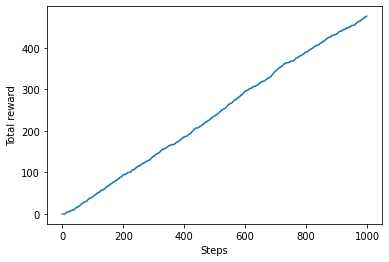

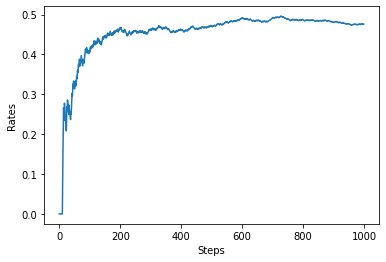

In [22]:
import matplotlib.pyplot as plt

steps = 1000
epsilon = 0.1

bandit = Bandit()
agent = Agent(epsilon)
total_reward = 0
total_rewards = []
rates = []

for step in range(steps):
  # (1) Choose an action
  action = agent.get_action()
  # (2) Get rewarded for actually playing
  reward = bandit.play(action)
  # (3) Learning from Behavior and Rewards
  agent.update(action, reward)
  total_reward += reward

  total_rewards.append(total_reward)
  rates.append(total_reward / (step+1))

print(total_reward)

# Drawing Graphs(1)
plt.ylabel('Total reward')
plt.xlabel('Steps')
plt.plot(total_rewards)
plt.show()

# Drawing Graphs(2)
plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(rates)
plt.show()

### 1.4.4 Average nature of the algorithm

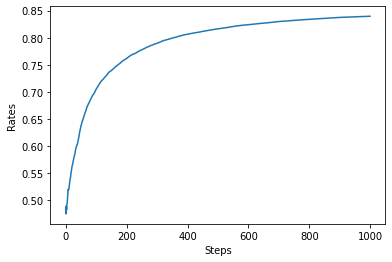

In [23]:
from math import e
runs = 200
steps = 1000
epsilon = 0.1
all_rates = np.zeros((runs, steps))

for run in range(runs):
  bandit = Bandit()
  agent = Agent(epsilon)
  total_reward = 0
  rates = []

  for step in range(steps):
    action = agent.get_action()
    reward = bandit.play(action)
    agent.update(action, reward)
    total_reward += reward
    rates.append(total_reward / (step+1))
  
  # (1) Record the results of the reward
  all_rates[run] = rates

# (2) Find the average value at each step
avg_rates = np.average(all_rates, axis=0)

# (3) Drawing Graphs
plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(avg_rates)
plt.show()